In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load COVID-19 data
covid_data = pd.read_csv('/content/drive/MyDrive/owid-covid-data.csv')

# Filter data for the US, China, France, and Germany
countries = ['United States', 'China', 'France', 'Germany']
covid_data = covid_data[covid_data['location'].isin(countries)]

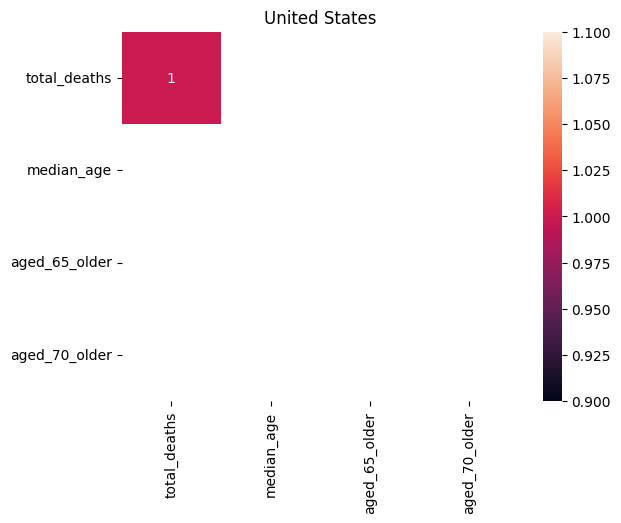

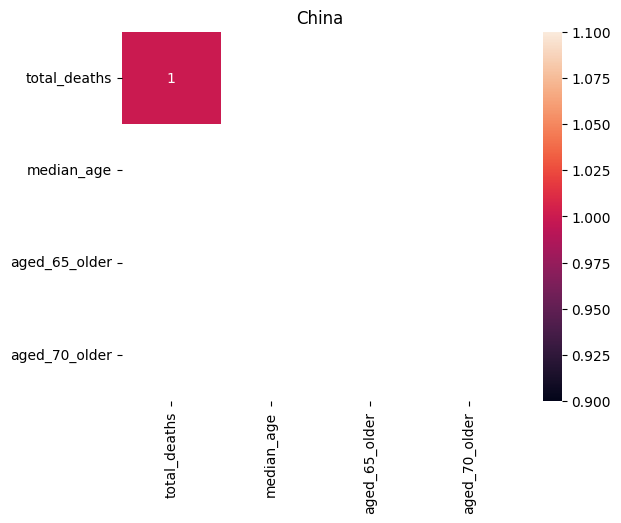

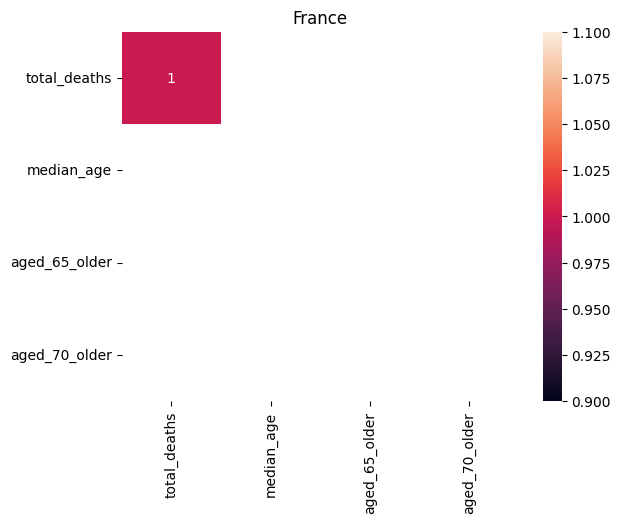

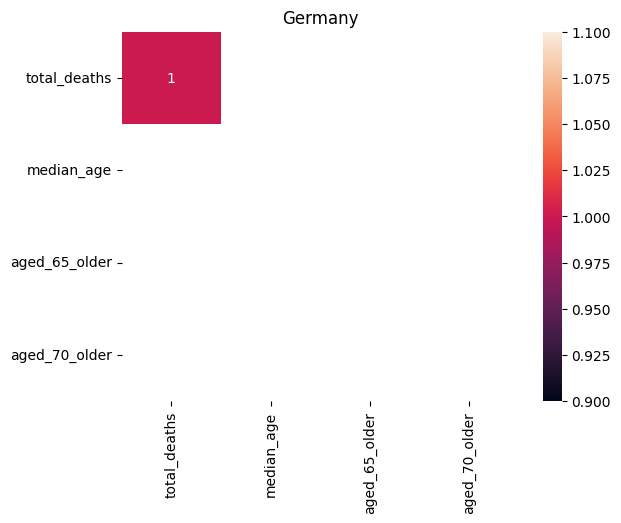

In [3]:
import seaborn as sns
for country in countries:
  correlation = covid_data[covid_data['location'] == country]
  correlation = correlation[['total_deaths', 'median_age', 'aged_65_older', 'aged_70_older']].corr()
  plt.figure()
  heatmap_vis = sns.heatmap(correlation, annot=True).set_title(country)

After I checked using correlation, there was no big correlation between total deaths and age (median_age, aged_65_older, aged_70_older) from the 4 countries (USA, France, Germany, China).

In [4]:
for country in countries:
  cov_data = covid_data[covid_data['location'] == country]
  print(country)
  print("Unique Value in Median Age for Country", country, "\n", cov_data['median_age'].value_counts())
  print("Unique Value in Aged 65 Older for Country", country, "\n", cov_data['aged_65_older'].value_counts())
  print("Unique Value in Aged 70 Older for Country", country, "\n", cov_data['aged_70_older'].value_counts())
  print("=====================================")

United States
Unique Value in Median Age for Country United States 
 38.3    1200
Name: median_age, dtype: int64
Unique Value in Aged 65 Older for Country United States 
 15.413    1200
Name: aged_65_older, dtype: int64
Unique Value in Aged 70 Older for Country United States 
 9.732    1200
Name: aged_70_older, dtype: int64
China
Unique Value in Median Age for Country China 
 38.7    1196
Name: median_age, dtype: int64
Unique Value in Aged 65 Older for Country China 
 10.641    1196
Name: aged_65_older, dtype: int64
Unique Value in Aged 70 Older for Country China 
 5.929    1196
Name: aged_70_older, dtype: int64
France
Unique Value in Median Age for Country France 
 42.0    1201
Name: median_age, dtype: int64
Unique Value in Aged 65 Older for Country France 
 19.718    1201
Name: aged_65_older, dtype: int64
Unique Value in Aged 70 Older for Country France 
 13.079    1201
Name: aged_70_older, dtype: int64
Germany
Unique Value in Median Age for Country Germany 
 46.6    1202
Name: media

And after I checked it seemed something was wrong, that is, the age (median_age, aged_65_older, aged_70_older) is even though the age change date (median_age, aged_65_older, aged_70_older) is a fixed value / does not change. After I checked the metadata again, the value was obtained from:

```
median_age : UN Population Division, World Population Prospects, 2017 Revision, Median age of the population, UN projection for 2020

aged_65_older : World Bank World Development Indicators based on age/sex distributions of United Nations World Population Prospects 2017 Revision, Share of the population that is 65 years and older, most recent year available

aged_70_older : United Nations, Department of Economic and Social Affairs, Population Division (2017), World Population Prospects 2017 Revision, Share of the population that is 70 years and older in 2015
```


In [5]:
for country in countries:
  cov_data = covid_data[covid_data['location'] == country]
  total_death = cov_data['total_deaths'].max()
  median_age = cov_data.iloc[0]['median_age']
  print("Covid data for", country, "with a median age of ", median_age, ", total deaths are :", total_death)
  print("================================================================================================================")

Covid data for United States with a median age of  38.3 , total deaths are : 1118800.0
Covid data for China with a median age of  38.7 , total deaths are : 120905.0
Covid data for France with a median age of  42.0 , total deaths are : 162176.0
Covid data for Germany with a median age of  46.6 , total deaths are : 171411.0


There are some insights that I understand, the greater the median age of a country, the more total deaths, because covid is a virus that attacks our immune system, this virus is dangerous for people who are old but can also be dangerous for people who are old young.